## The data grabbed from UHF antenna

The Parallella (Pcko) grabbing unit was used to capture triggered data from loop antennas.

In [1]:
# Tato bunka slouzi pro papermill, je oznacena tagem 'parameters'

path = "/storage/experiments/2022/0714_bourka_krivoklatsko_CAR2/parallella/"

In [2]:
import os
import sys
#sys.path.append('..')
#from QFH_lightning.readrec import *
from readrec import *
import matplotlib
from scipy.signal import find_peaks


sps = 10e6 # 10 Msps
files = os.listdir(path)

for fn in files:
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            h, samples, synclog = loadrec(f, skipsamples=True)
        except Exception as e:
            print(fn, e)
            continue

print("Budou se pouzivat soubory", files)
print("Ze slozky", path)

Budou se pouzivat soubory ['rec_220714-183822.15', 'rec_220714-184707.21.png', 'rec_220704-143545.66', 'rec_220714-181751.39.png', 'rec_220714-183336.51', 'rec_220714-184707.21', 'rec_220714-172928.32', 'rec_220714-183336.51.png', 'rec_220714-183822.15.png', 'rec_220714-170917.90.png', 'rec_220704-143545.66.png', 'rec_220714-170917.90', 'rec_220714-172928.32.png', 'rec_220714-181930.89', 'rec_220714-171416.76.png', 'rec_220714-171821.00.png', 'rec_220714-135036.81', 'rec_220714-135036.81.png', 'rec_220714-173146.63.png', 'rec_220714-181930.89.png', 'rec_220714-171821.00', 'rec_220714-181751.39', 'rec_220714-183021.84.png', 'rec_220714-171416.76', 'rec_220714-173146.63', 'rec_220714-183021.84']
Ze slozky /storage/experiments/2022/0714_bourka_krivoklatsko_CAR2/parallella/


/home/roman/repos/CRREAT_cars/UHF_lightning/readrec.py:20: RuntimeWarning: overflow encountered in long_scalars
  samplebytes = (head['preTrigger'] + head['postTrigger']) * head['descSpan']


## Plotting of the data

rec_220714-183822.15
File: rec_220714-183822.15
0 14614528 14614528
0 14614528 14614528
0 14614528 14614528


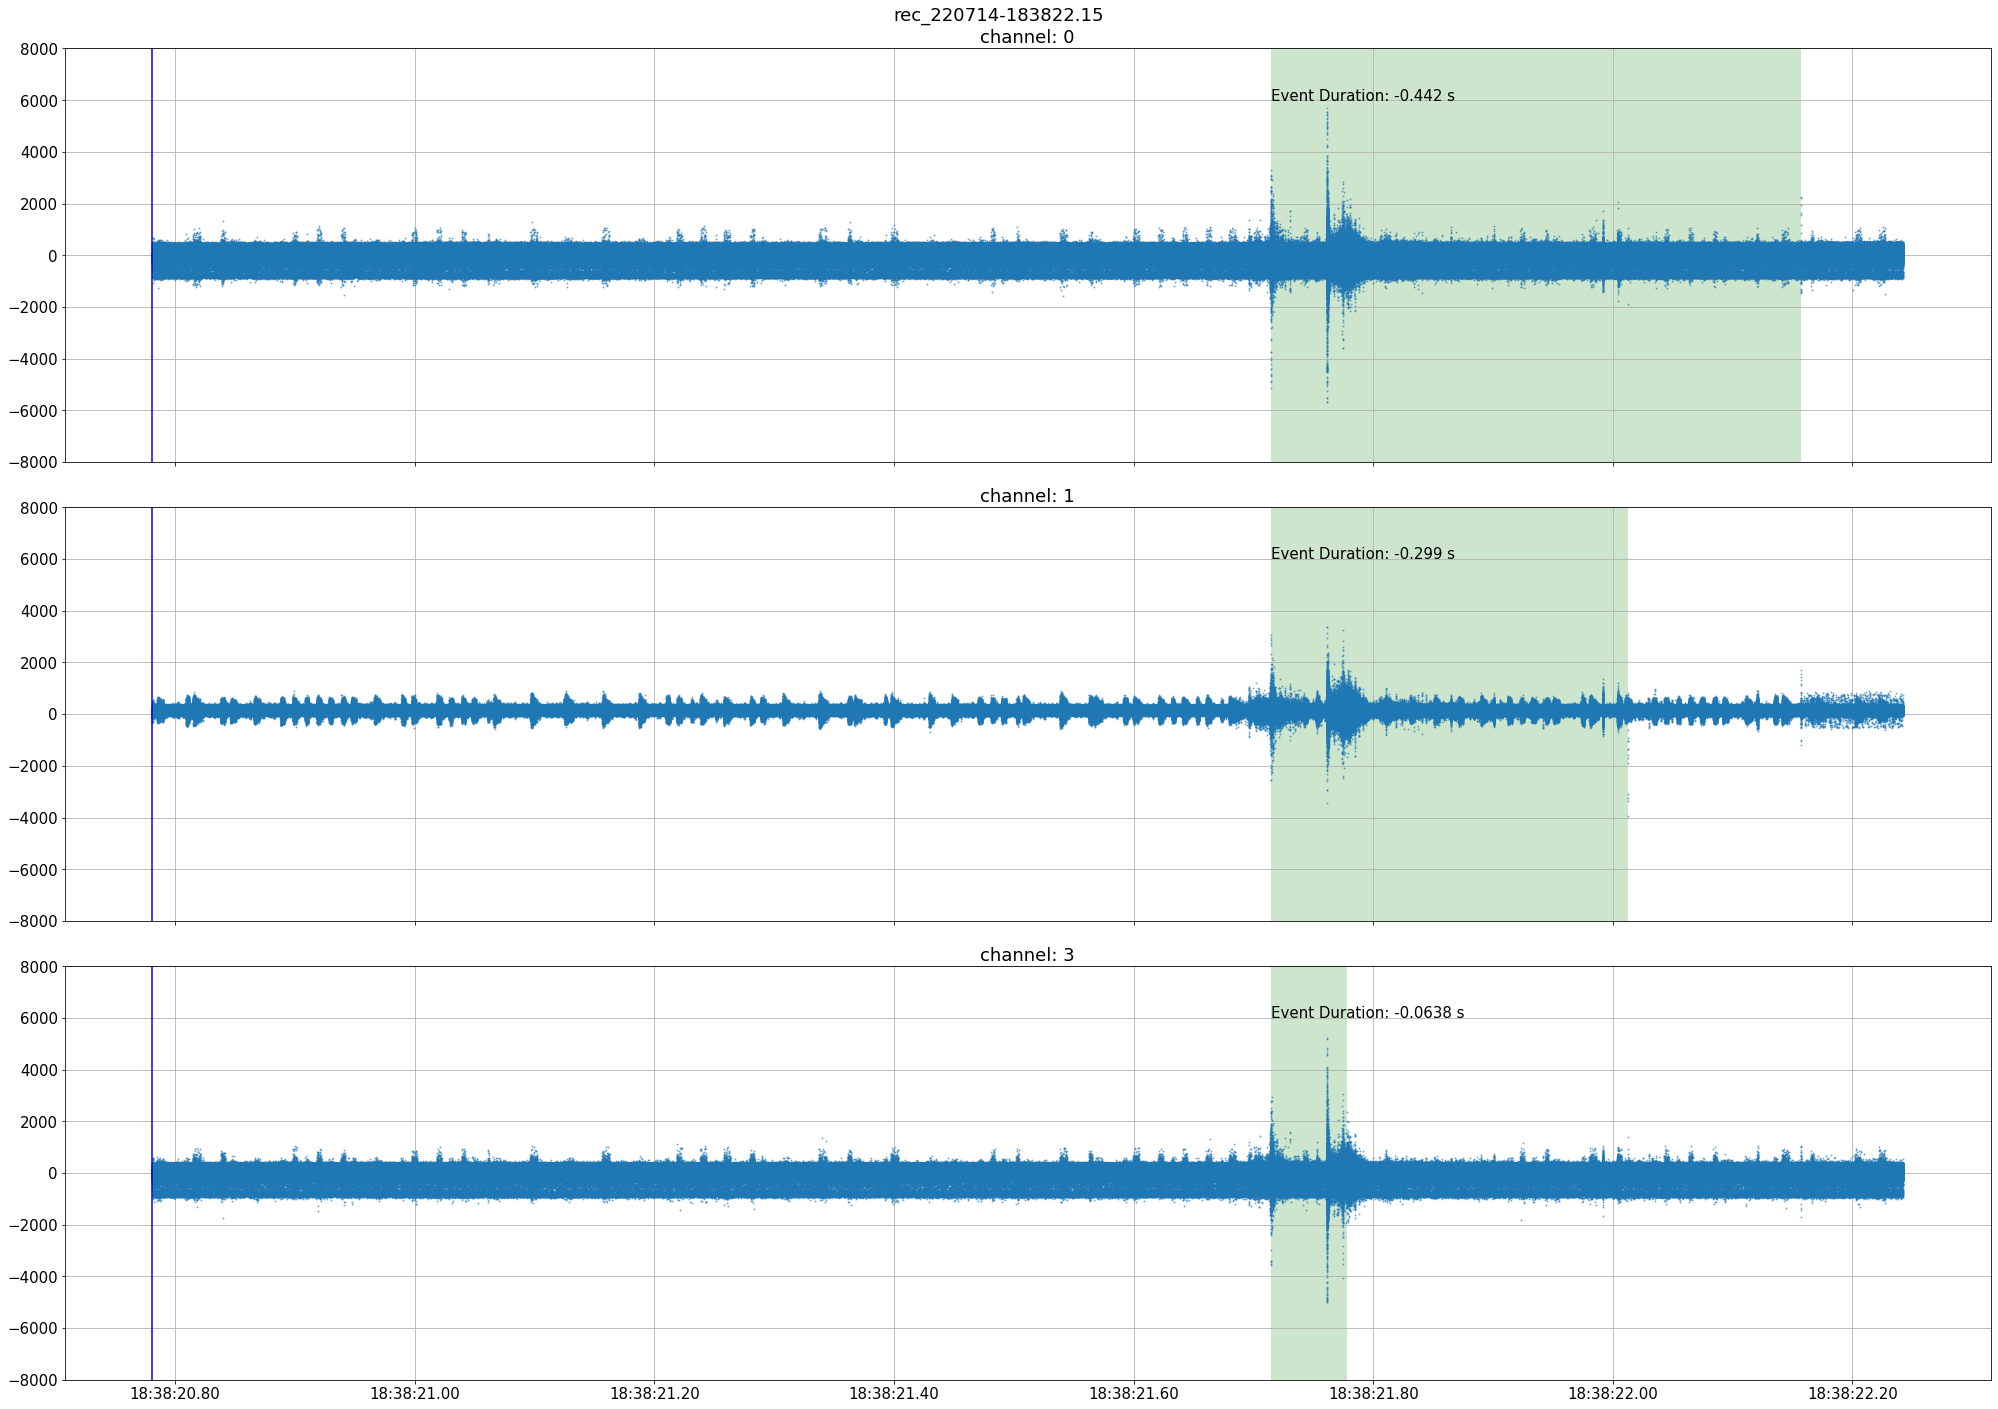

rec_220714-184707.21.png
File: rec_220714-184707.21.png
Unable to allocate 1.08 EiB for an array with shape (77464139244503040, 8) and data type int16
rec_220704-143545.66
File: rec_220704-143545.66


/home/roman/repos/CRREAT_cars/UHF_lightning/readrec.py:20: RuntimeWarning: overflow encountered in long_scalars
  samplebytes = (head['preTrigger'] + head['postTrigger']) * head['descSpan']


0 14614528 14614528
0 14614528 14614528
0 14614528 14614528


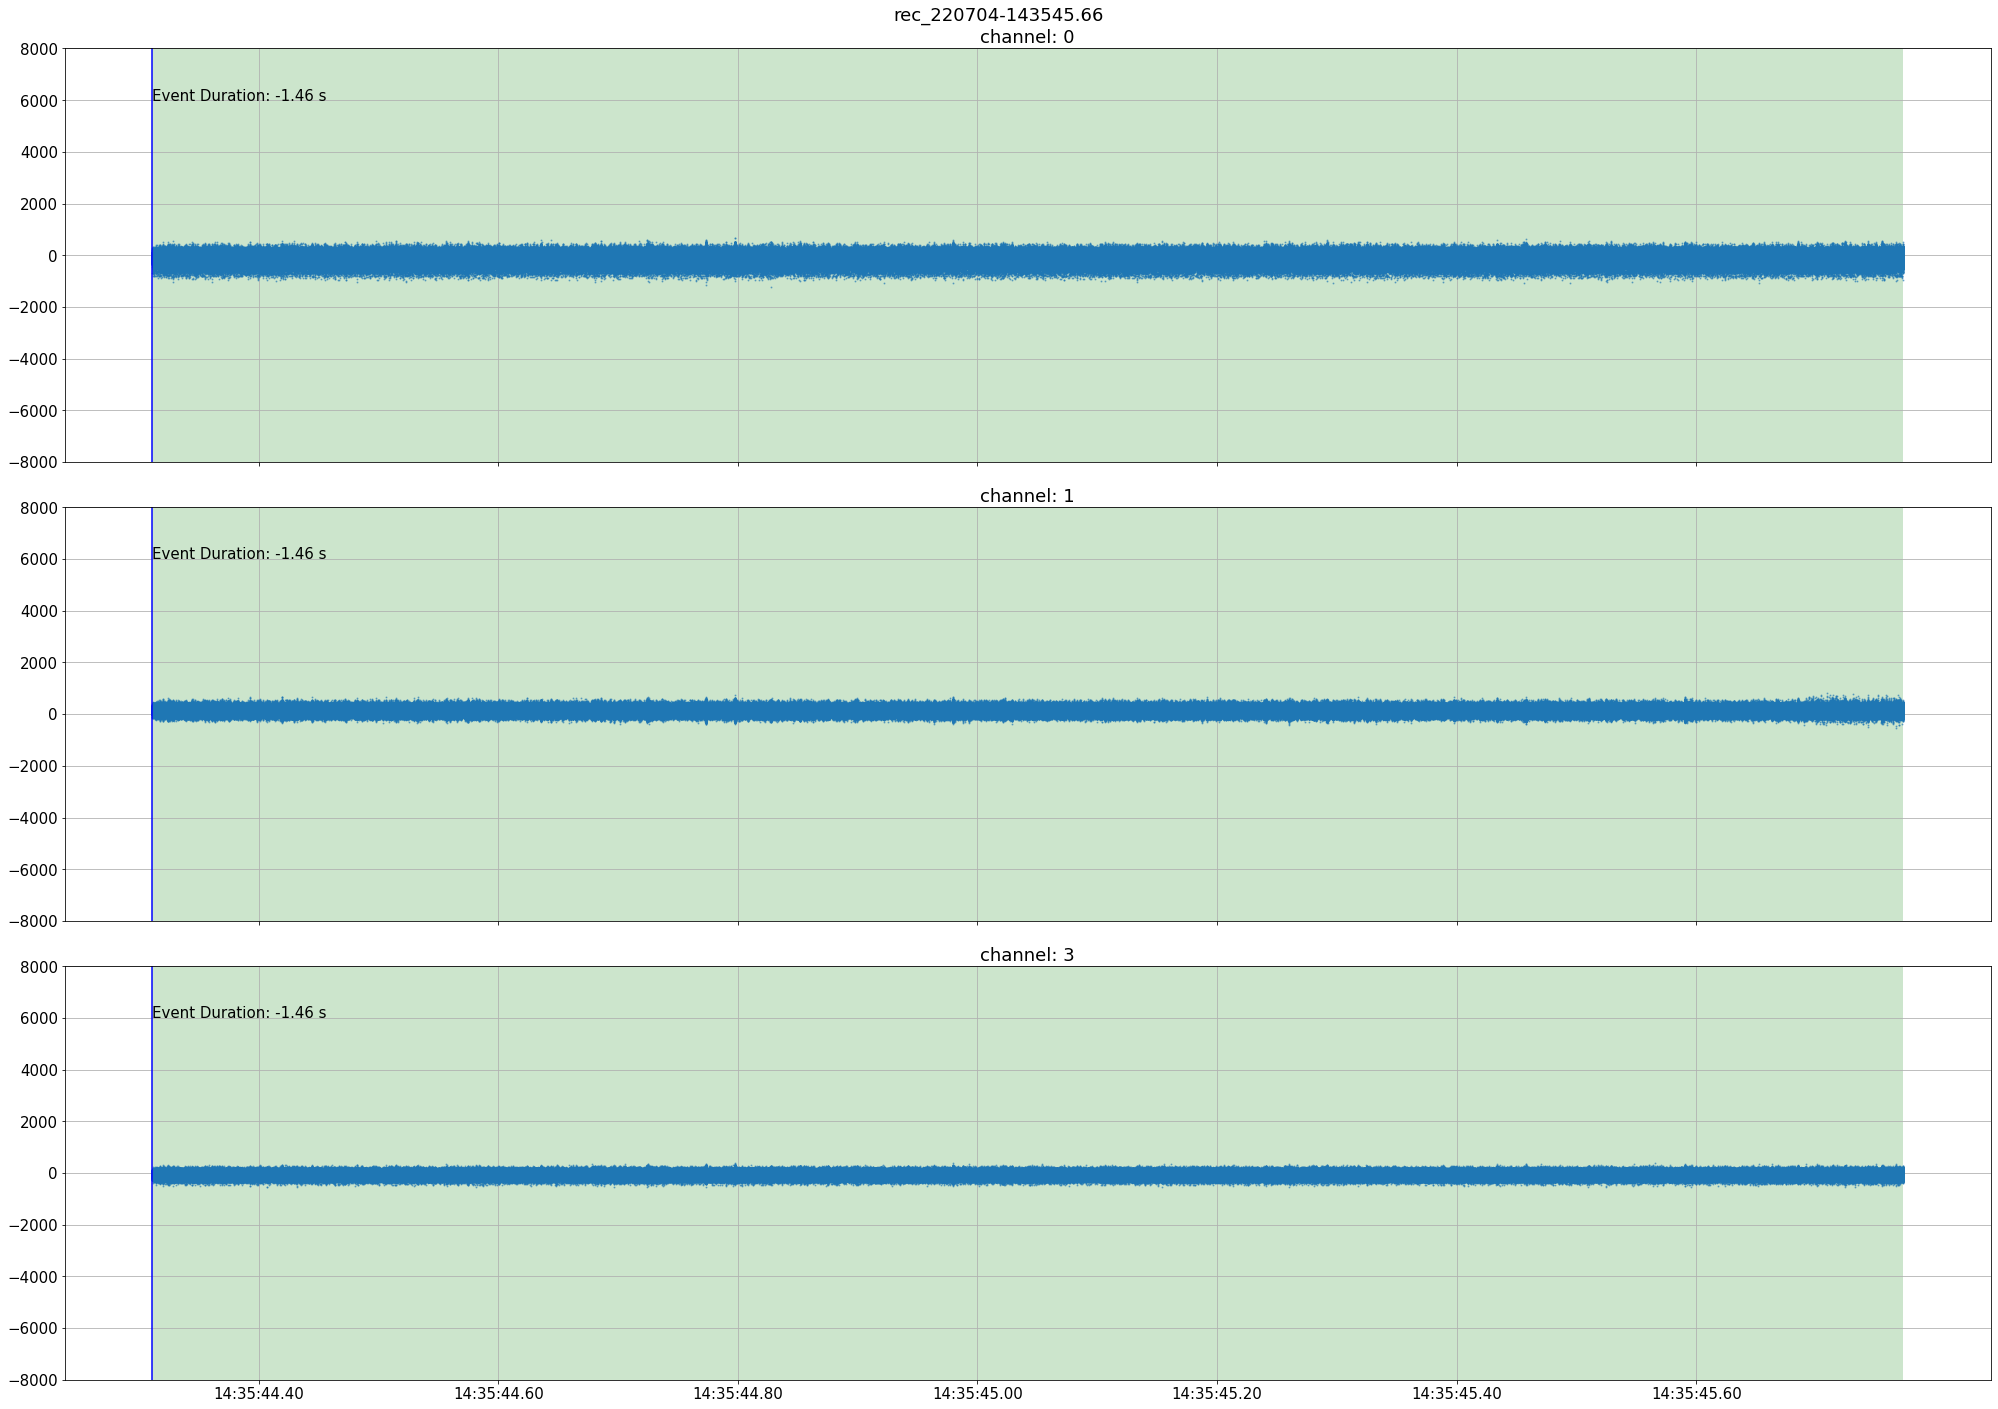

rec_220714-181751.39.png
File: rec_220714-181751.39.png
Unable to allocate 1.08 EiB for an array with shape (77464139244503040, 8) and data type int16
rec_220714-183336.51
File: rec_220714-183336.51


/home/roman/repos/CRREAT_cars/UHF_lightning/readrec.py:20: RuntimeWarning: overflow encountered in long_scalars
  samplebytes = (head['preTrigger'] + head['postTrigger']) * head['descSpan']


0 14614528 14614528
0 14614528 14614528
0 14614528 14614528


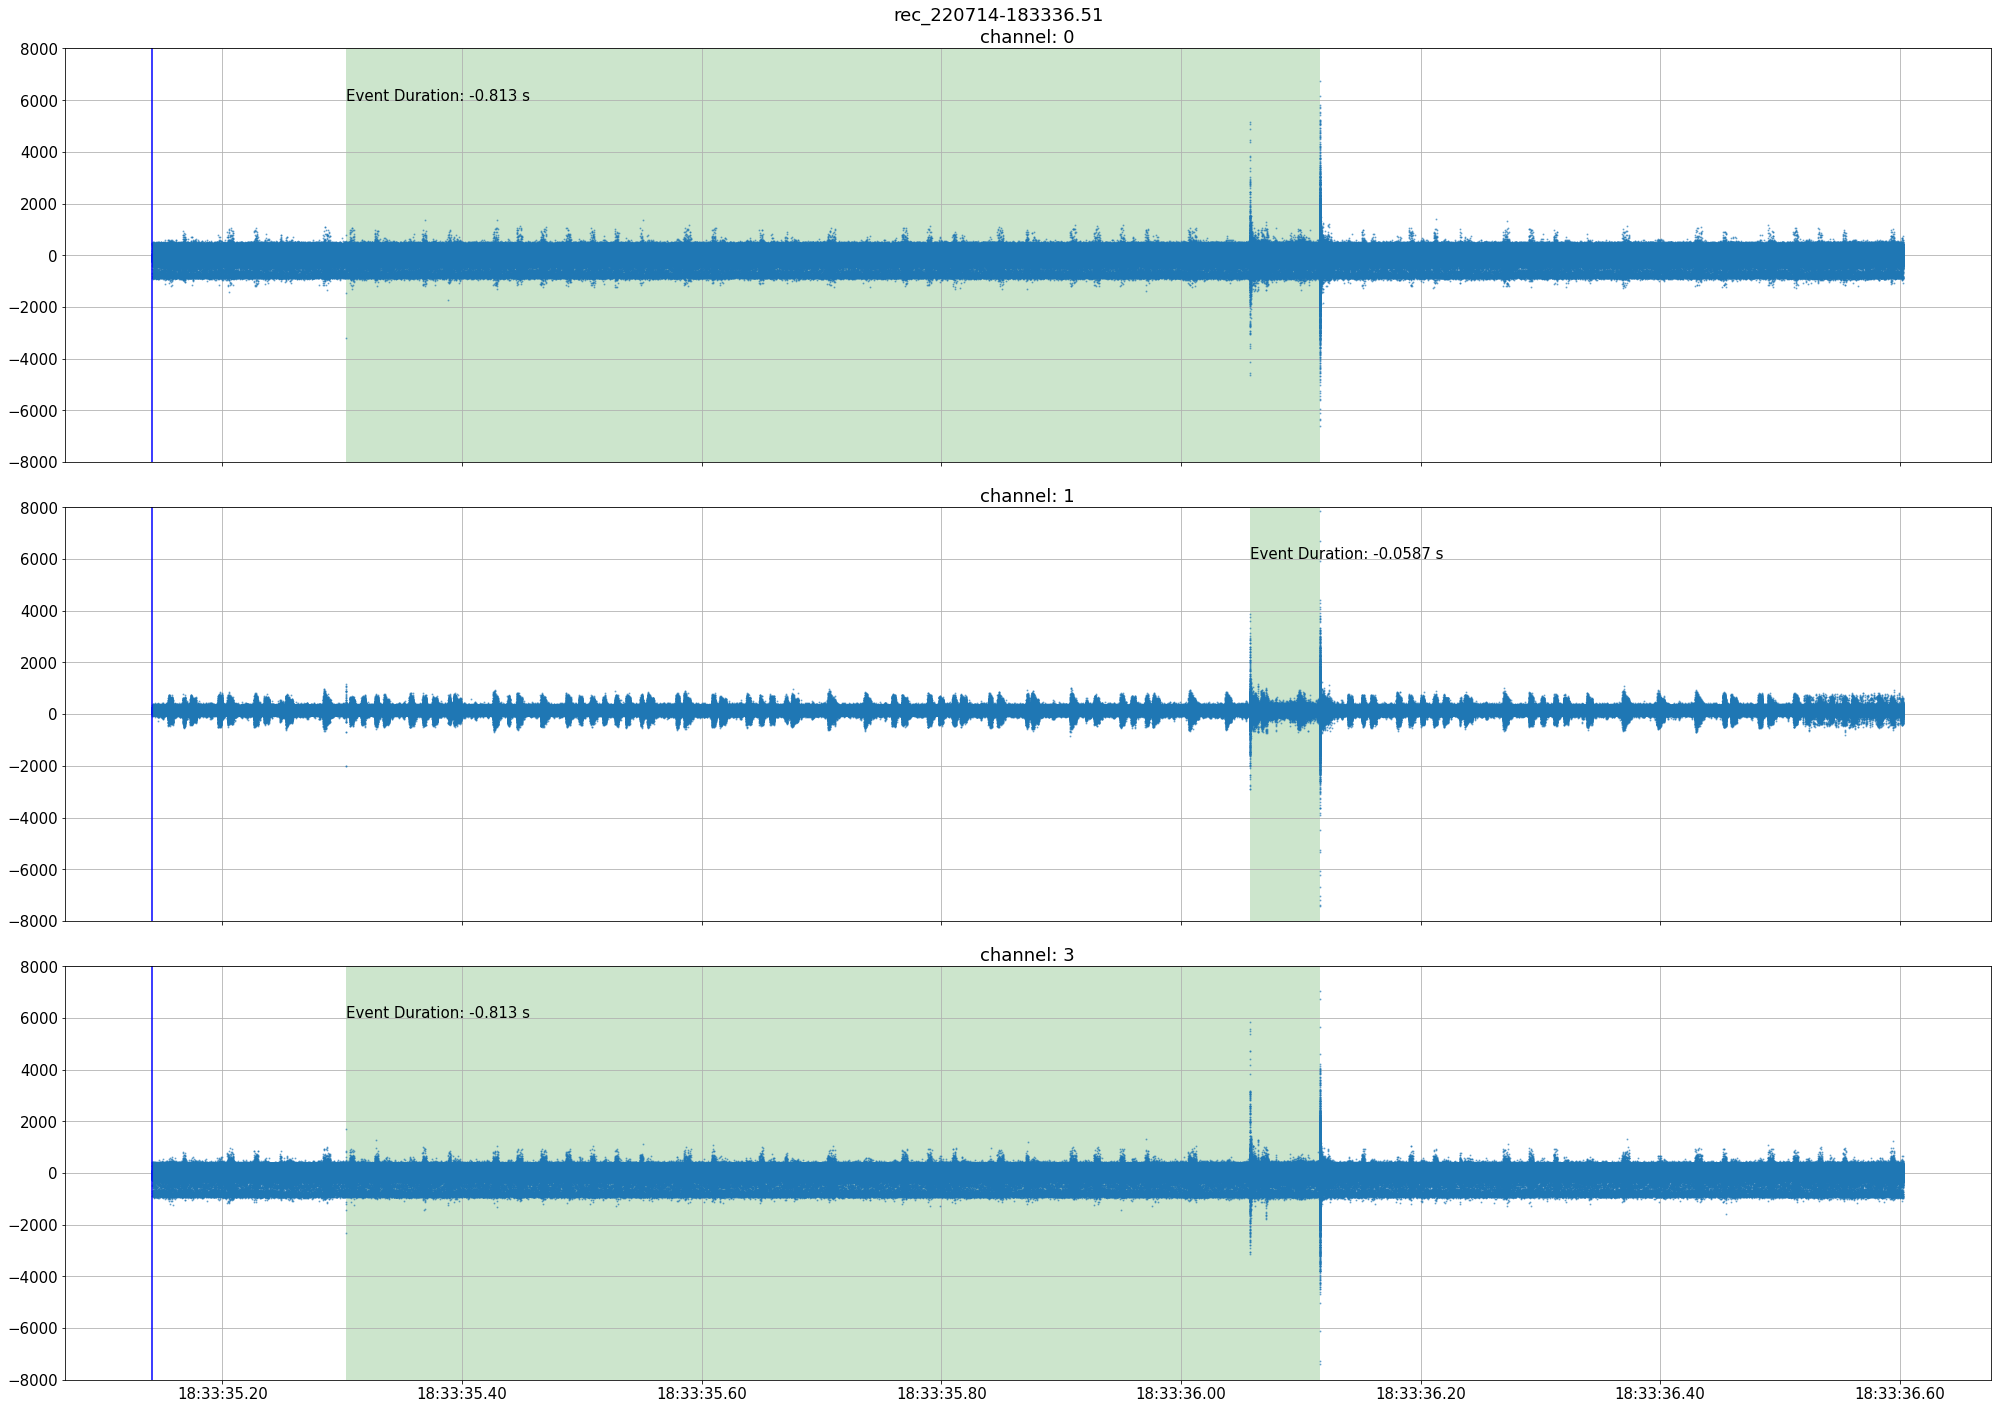

rec_220714-184707.21
File: rec_220714-184707.21
0 14614528 14614528
0 14614528 14614528
0 14614528 14614528


In [ ]:
import os
pre_trigger_blocks = 380
post_trigger_blocks = 380


pre_trigger_blocks = 100
post_trigger_blocks = 100


matplotlib.rcParams.update({'font.size':15})

for fn in files:
    print(fn)
    if ".csv" in files:
        continue
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            print("File:", fn)
            h, samples, synclog = loadrec(f)
            t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)
            fig = selective_plotrec(h, samples, synclog, os.path.basename(fn),
                    title=os.path.basename(fn),
                    pre_trigger_blocks = pre_trigger_blocks,
                    post_trigger_blocks = post_trigger_blocks,
                    marktimes=ticker,
                    channels = [0,1,3],
                    #channels = [0,1,2,3,4,5,6,7]
                    )
            
            plt.tight_layout()
            try:
                plt.savefig(os.path.join(path, fn)+'.png')
            except Exception as e:
                print(e)
            #plt.savefig('/home/roman/UHF.png')
            plt.show()
   
        except Exception as e:
            print(e)

Plot all lightning records (High memory and time consuming)